## ANN to Predict Ice Cream Sales using outside Temperature

* You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decided to build a simple Artificial Neural Network to solve this problem.

* Data set:

    * Input (X): Outside Air Temperature
    * Output (Y): Overall daily revenue generated in dollars

* This example is a regression example, we will cover regression in more details in future projects.

<table>
  <tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg"
          width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1. Predict Ice Cream Sales [Source: https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg]
  </td></tr>
</table>

Figure 1. Predict Ice Cream Sales [Source: https://upload.wikimedia.org/wikipedia/commons/6/63/Big_Gay_Ice_Cream_Truck.jpg]


In [1]:
# Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import tensorflow as tf

In [2]:
# Note this code is only valid if GPU is being used for training

# Before we run the parameter tuning, we will work with little gpu memory allocation
# we will only use that much of memory of gpu as it is needed - allow the growth of gpu memory as it is needed

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

### Load the dataset

In [3]:
# Load the data and check the initial rows

sales_df = pd.read_csv("./resources/SalesData.csv")

sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
# Check for missing values

sales_df.isna().sum()

Temperature    0
Revenue        0
dtype: int64

In [5]:
# Check the data structure
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [6]:
# Check summary statistics
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


### Visualize the dataset

Text(0, 0.5, 'Sales Revenue')

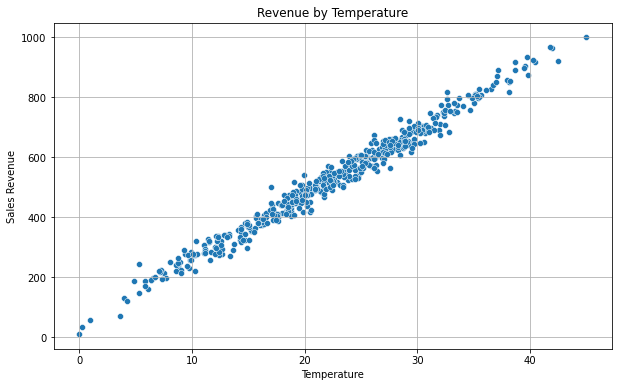

In [7]:
plt.figure(figsize=(10, 6))
plt.grid()
sns.scatterplot(x='Temperature', y='Revenue', data=sales_df)
plt.title("Revenue by Temperature")
plt.xlabel("Temperature")
plt.ylabel("Sales Revenue")

### Create the test and training set

In [8]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

### Build and Train the model

In [9]:
X_train.shape

(500,)

In [10]:
y_train.shape

(500,)

In [11]:
# we will build the model

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape=[1]))

2022-07-12 13:55:36.175910: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# compile the model

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.9), loss='mean_squared_error')

In [13]:
# Visualize the model

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [14]:
epochs_hist = model.fit(X_train, y_train, epochs=200)

2022-07-12 13:55:47.324374: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/200
16/16 [==============================] - 0s 637us/step - loss: 195774.7767
Epoch 2/200
16/16 [==============================] - 0s 641us/step - loss: 18670.4112
Epoch 3/200
16/16 [==============================] - 0s 616us/step - loss: 2114.6954
Epoch 4/200
16/16 [==============================] - 0s 597us/step - loss: 1808.4162
Epoch 5/200
16/16 [==============================] - 0s 734us/step - loss: 691.3052
Epoch 6/200
16/16 [==============================] - 0s 740us/step - loss: 704.3748
Epoch 7/200
16/16 [==============================] - 0s 680us/step - loss: 628.7363
Epoch 8/200
16/16 [==============================] - 0s 692us/step - loss: 697.9078
Epoch 9/200
16/16 [==============================] - 0s 942us/step - loss: 695.1639
Epoch 10/200
16/16 [==============================] - 0s 749us/step - loss: 695.9181
Epoch 11/200
16/16 [==============================] - 0s 729us/step - loss: 687.2700
Epoch 12/200
16/16 [==============================] - 0s 638us/step

### Evaluate the model

In [15]:
epochs_hist.history.keys()

dict_keys(['loss'])

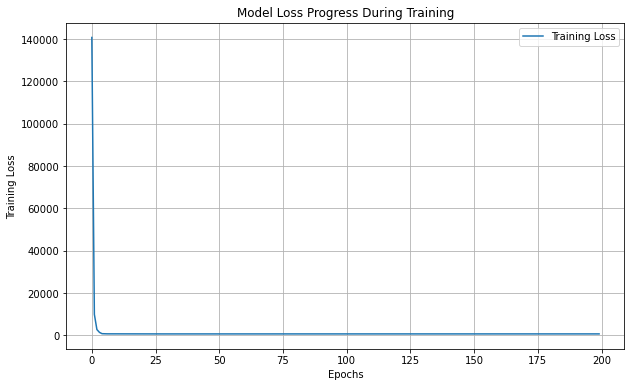

In [16]:
# We will plot the loss
plt.figure(figsize=(10, 6))
plt.grid()
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [17]:
# get the optimum weights

model.get_weights()

[array([[21.361115]], dtype=float32), array([44.54227], dtype=float32)]

In [18]:
# Now we will use the trained model for predictions

Temp = 5
Revenue = model.predict([Temp])
print('Revenue prediction using the trained ANN =', Revenue)

Revenue prediction using the trained ANN = [[151.34784]]


Text(0.5, 1.0, 'Revenue Generated vs Temperature @ IceCream Stand')

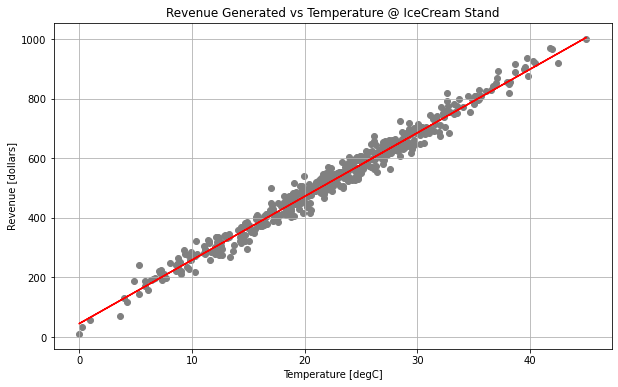

In [19]:
# Now lets plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.grid()
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, model.predict(X_train), color='red')
plt.ylabel("Revenue [dollars]")
plt.xlabel('Temperature [degC]')
plt.title("Revenue Generated vs Temperature @ IceCream Stand")

### Now we will confirm using Scikit Learn

In [20]:
X_train = X_train.values.reshape(-1, 1) # reshaping to a numpy array
X_train.shape

(500, 1)

In [21]:
y_train = y_train.values.reshape(-1, 1)
y_train.shape

(500, 1)

In [22]:
# Fit the linear regressor on our dataset

from sklearn.linear_model import LinearRegression

regressor = LinearRegression(fit_intercept=False)
regressor.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [23]:
# Check the coefficient and intercept

print('Linear Model Coeff(m)', regressor.coef_)
print('Linear Model Coeff(b)', regressor.intercept_)

Linear Model Coeff(m) [[23.22442357]]
Linear Model Coeff(b) 0.0


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

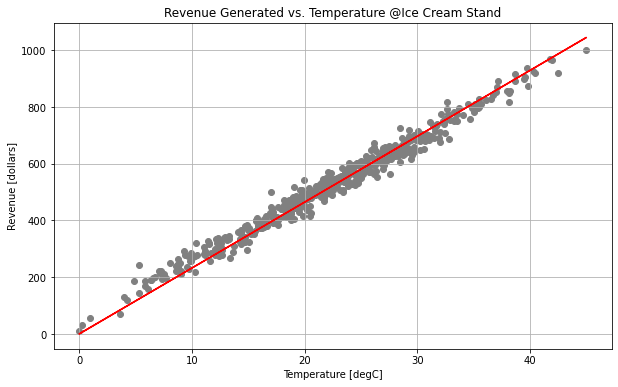

In [24]:
# Now we will plot the actial vs predicted
plt.figure(figsize=(10, 6))
plt.grid()
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')